<a href="https://colab.research.google.com/github/Ricardojnf33/Blog_Data_Science/blob/main/Import%C3%A2ncia_da_Prepara%C3%A7%C3%A3o_dos_Dados_em_Projetos_de_An%C3%A1lise_de_Dados_e_Aprendizado_de_M%C3%A1quina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importância da Preparação dos Dados em Projetos de Análise de Dados e Aprendizado de Máquina
## Preparação dos Dados

#Importação de bibliotecas:
Importamos as bibliotecas necessárias, incluindo pandas para manipulação de dados, numpy para operações numéricas, e do sklearn.preprocessing importamos StandardScaler, LabelEncoder e MinMaxScaler para o pré-processamento dos dados.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

# Importação das bibliotecas necessárias para o heatmap
import seaborn as sns
import matplotlib.pyplot as plt

#Criação do DataFrame de exemplo:
Criamos um DataFrame chamado 'df' com algumas colunas: 'ID', 'Nome', 'Idade', 'Salário' e 'Cargo'. Esse DataFrame é preenchido com alguns valores, incluindo alguns valores nulos (None) e uma categoria ausente (None) na coluna 'Cargo'.

In [2]:
# Criando um DataFrame de exemplo
dados = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8],
    'Nome': ['João', 'Maria', 'José', 'Ana', 'Pedro', 'Eva', 'Fernanda', 'Carlos'],
    'Idade': [25, 30, None, 22, 28, 35, 27, 40],
    'Salário': [3500, 4000, 2800, 3200, None, 4200, 3800, 5000],
    'Cargo': ['Analista', 'Gerente', 'Analista', 'Estagiário', 'Gerente', None, 'Analista', 'Diretor']
}

df = pd.DataFrame(dados)
print(df)

   ID      Nome  Idade  Salário       Cargo
0   1      João   25.0   3500.0    Analista
1   2     Maria   30.0   4000.0     Gerente
2   3      José    NaN   2800.0    Analista
3   4       Ana   22.0   3200.0  Estagiário
4   5     Pedro   28.0      NaN     Gerente
5   6       Eva   35.0   4200.0        None
6   7  Fernanda   27.0   3800.0    Analista
7   8    Carlos   40.0   5000.0     Diretor


#Lidando com valores ausentes:
Utilizamos o método dropna() para remover as linhas que possuem valores nulos em qualquer coluna. O resultado é armazenado no DataFrame 'df_limpo', que é redefinido com um novo índice. Em seguida, imputamos os valores ausentes na coluna 'Salário', preenchendo-os com a média dos salários não nulos.

In [3]:
# Lidando com valores ausentes
df_limpo = df.dropna().reset_index(drop=True)  # Removendo as linhas com valores ausentes
print("\nDataFrame após remoção de linhas com valores ausentes:")
print(df_limpo)



DataFrame após remoção de linhas com valores ausentes:
   ID      Nome  Idade  Salário       Cargo
0   1      João   25.0   3500.0    Analista
1   2     Maria   30.0   4000.0     Gerente
2   4       Ana   22.0   3200.0  Estagiário
3   7  Fernanda   27.0   3800.0    Analista
4   8    Carlos   40.0   5000.0     Diretor


In [4]:
# Corrigindo erros ou imputando valores
valor_medio_salario = df['Salário'].mean()
df['Salário'].fillna(valor_medio_salario, inplace=True)  # Preenchendo valores ausentes com a média dos salários
print("\nDataFrame após imputação de valores ausentes no salário:")
print(df)


DataFrame após imputação de valores ausentes no salário:
   ID      Nome  Idade      Salário       Cargo
0   1      João   25.0  3500.000000    Analista
1   2     Maria   30.0  4000.000000     Gerente
2   3      José    NaN  2800.000000    Analista
3   4       Ana   22.0  3200.000000  Estagiário
4   5     Pedro   28.0  3785.714286     Gerente
5   6       Eva   35.0  4200.000000        None
6   7  Fernanda   27.0  3800.000000    Analista
7   8    Carlos   40.0  5000.000000     Diretor


#Remoção de duplicatas:
Utilizamos o método drop_duplicates() para remover linhas duplicadas do DataFrame 'df'. O resultado é armazenado no DataFrame 'df_sem_duplicatas', que também é redefinido com um novo índice.

In [5]:
# Removendo duplicatas
df_sem_duplicatas = df.drop_duplicates().reset_index(drop=True)
print("\nDataFrame após remoção de duplicatas:")
print(df_sem_duplicatas)


DataFrame após remoção de duplicatas:
   ID      Nome  Idade      Salário       Cargo
0   1      João   25.0  3500.000000    Analista
1   2     Maria   30.0  4000.000000     Gerente
2   3      José    NaN  2800.000000    Analista
3   4       Ana   22.0  3200.000000  Estagiário
4   5     Pedro   28.0  3785.714286     Gerente
5   6       Eva   35.0  4200.000000        None
6   7  Fernanda   27.0  3800.000000    Analista
7   8    Carlos   40.0  5000.000000     Diretor


#Escalonamento de Variáveis Numéricas:
Utilizamos o StandardScaler para padronizar a coluna 'Salário' do DataFrame 'df_limpo', transformando-a para ter média zero e desvio padrão igual a 1. A coluna escalonada é adicionada ao DataFrame como 'Salário_Escalonado'.

In [6]:
# Escalonamento de Variáveis Numéricas
scaler = StandardScaler()
df_limpo['Salário_Escalonado'] = scaler.fit_transform(df_limpo[['Salário']])
print("\nDataFrame com a coluna 'Salário' escalonada:")
print(df_limpo[['ID', 'Nome', 'Salário', 'Salário_Escalonado']])


DataFrame com a coluna 'Salário' escalonada:
   ID      Nome  Salário  Salário_Escalonado
0   1      João   3500.0           -0.652328
1   2     Maria   4000.0            0.163082
2   4       Ana   3200.0           -1.141574
3   7  Fernanda   3800.0           -0.163082
4   8    Carlos   5000.0            1.793902


#Codificação de Variáveis Categóricas:
Utilizamos o LabelEncoder para transformar a coluna 'Cargo' do DataFrame 'df_limpo' em valores numéricos codificados. Cada categoria única recebe um número inteiro correspondente na nova coluna 'Cargo_Codificado'.

In [7]:
# Codificação de Variáveis Categóricas
le = LabelEncoder()
df_limpo['Cargo_Codificado'] = le.fit_transform(df_limpo['Cargo'])
print("\nDataFrame com a coluna 'Cargo' codificada:")
print(df_limpo[['ID', 'Nome', 'Cargo', 'Cargo_Codificado']])


DataFrame com a coluna 'Cargo' codificada:
   ID      Nome       Cargo  Cargo_Codificado
0   1      João    Analista                 0
1   2     Maria     Gerente                 3
2   4       Ana  Estagiário                 2
3   7  Fernanda    Analista                 0
4   8    Carlos     Diretor                 1


#Criação de Novas Variáveis:
Criamos uma nova coluna 'Score' no DataFrame 'df_limpo', que representa o resultado da divisão do 'Salário' pela 'Idade'. Essa coluna representa uma nova métrica calculada a partir das informações existentes no DataFrame.

In [8]:
# Criação de Novas Variáveis
df_limpo['Score'] = df_limpo['Salário'] / df_limpo['Idade']
print("\nDataFrame com a nova coluna 'Score':")
print(df_limpo[['ID', 'Nome', 'Salário', 'Idade', 'Score']])


DataFrame com a nova coluna 'Score':
   ID      Nome  Salário  Idade       Score
0   1      João   3500.0   25.0  140.000000
1   2     Maria   4000.0   30.0  133.333333
2   4       Ana   3200.0   22.0  145.454545
3   7  Fernanda   3800.0   27.0  140.740741
4   8    Carlos   5000.0   40.0  125.000000


#Normalização de Variáveis:
Utilizamos o MinMaxScaler para normalizar a coluna 'Idade' do DataFrame 'df_limpo', transformando os valores para o intervalo [0, 1]. A coluna normalizada é adicionada ao DataFrame como 'Idade_Normalizada'.

In [9]:
# Normalização de Variáveis
scaler = MinMaxScaler()
df_limpo['Idade_Normalizada'] = scaler.fit_transform(df_limpo[['Idade']])
print("\nDataFrame com a coluna 'Idade' normalizada:")
print(df_limpo[['ID', 'Nome', 'Idade', 'Idade_Normalizada']])


DataFrame com a coluna 'Idade' normalizada:
   ID      Nome  Idade  Idade_Normalizada
0   1      João   25.0           0.166667
1   2     Maria   30.0           0.444444
2   4       Ana   22.0           0.000000
3   7  Fernanda   27.0           0.277778
4   8    Carlos   40.0           1.000000


#Transformação Logarítmica:
Criamos uma nova coluna 'Salário_Log' no DataFrame 'df_limpo', que contém os valores de 'Salário' transformados usando logaritmo natural.

In [10]:
# Transformação Logarítmica
df_limpo['Salário_Log'] = np.log(df_limpo['Salário'])
print("\nDataFrame com a coluna 'Salário' transformada usando logaritmo:")
print(df_limpo[['ID', 'Nome', 'Salário', 'Salário_Log']])


DataFrame com a coluna 'Salário' transformada usando logaritmo:
   ID      Nome  Salário  Salário_Log
0   1      João   3500.0     8.160518
1   2     Maria   4000.0     8.294050
2   4       Ana   3200.0     8.070906
3   7  Fernanda   3800.0     8.242756
4   8    Carlos   5000.0     8.517193


#Tratando Outliers:
Calculamos o limite superior com base no terceiro quartil (quantile(0.75)) e tratamos os valores de 'Salário' acima desse limite, substituindo-os pelo limite superior. Essa etapa é importante para mitigar o impacto de valores extremos no modelo.

In [11]:
# Tratando Outliers
limite_superior = df_limpo['Salário'].quantile(0.75) + 1.5 * (df_limpo['Salário'].quantile(0.75) - df_limpo['Salário'].quantile(0.25))
df_limpo['Salário_Truncado'] = np.where(df_limpo['Salário'] > limite_superior, limite_superior, df_limpo['Salário'])
print("\nDataFrame com a coluna 'Salário' tratada para outliers:")
print(df_limpo[['ID', 'Nome', 'Salário', 'Salário_Truncado']])



DataFrame com a coluna 'Salário' tratada para outliers:
   ID      Nome  Salário  Salário_Truncado
0   1      João   3500.0            3500.0
1   2     Maria   4000.0            4000.0
2   4       Ana   3200.0            3200.0
3   7  Fernanda   3800.0            3800.0
4   8    Carlos   5000.0            4750.0


#Binning - Discretização de Variáveis Contínuas:
Criamos uma nova coluna 'Categoria_Salário' no DataFrame 'df_limpo', que discretiza os valores de 'Salário' em quatro categorias: 'Baixo', 'Médio', 'Alto' e 'Muito Alto'.

In [12]:
# Binning - Discretização de Variáveis Contínuas
bins = [0, 2500, 3500, 4500, np.inf]
labels = ['Baixo', 'Médio', 'Alto', 'Muito Alto']
df_limpo['Categoria_Salário'] = pd.cut(df_limpo['Salário'], bins=bins, labels=labels)
print("\nDataFrame com a coluna 'Salário' discretizada em categorias:")
print(df_limpo[['ID', 'Nome', 'Salário', 'Categoria_Salário']])


DataFrame com a coluna 'Salário' discretizada em categorias:
   ID      Nome  Salário Categoria_Salário
0   1      João   3500.0             Médio
1   2     Maria   4000.0              Alto
2   4       Ana   3200.0             Médio
3   7  Fernanda   3800.0              Alto
4   8    Carlos   5000.0        Muito Alto


#One-Hot Encoding para Variáveis Categóricas:
Utilizamos o pd.get_dummies para codificar a coluna 'Cargo' do DataFrame 'df_limpo' em colunas separadas usando a técnica de One-Hot Encoding. Essa técnica transforma cada categoria única em uma nova coluna binária indicando a presença da categoria para cada registro.

In [13]:
df_onehot = pd.get_dummies(df_limpo, columns=['Cargo'])
print("\nDataFrame com as colunas de 'Cargo' codificadas com One-Hot Encoding:")
print(df_onehot)


DataFrame com as colunas de 'Cargo' codificadas com One-Hot Encoding:
   ID      Nome  Idade  Salário  Salário_Escalonado  Cargo_Codificado  \
0   1      João   25.0   3500.0           -0.652328                 0   
1   2     Maria   30.0   4000.0            0.163082                 3   
2   4       Ana   22.0   3200.0           -1.141574                 2   
3   7  Fernanda   27.0   3800.0           -0.163082                 0   
4   8    Carlos   40.0   5000.0            1.793902                 1   

        Score  Idade_Normalizada  Salário_Log  Salário_Truncado  \
0  140.000000           0.166667     8.160518            3500.0   
1  133.333333           0.444444     8.294050            4000.0   
2  145.454545           0.000000     8.070906            3200.0   
3  140.740741           0.277778     8.242756            3800.0   
4  125.000000           1.000000     8.517193            4750.0   

  Categoria_Salário  Cargo_Analista  Cargo_Diretor  Cargo_Estagiário  \
0             M

#Lidando com Valores Nulos novamente:
Imputamos os valores ausentes na coluna 'Idade' do DataFrame 'df_onehot', preenchendo-os com a média das idades presentes.

In [14]:
# Lidando com Valores Nulos novamente
df_onehot['Idade'].fillna(df_onehot['Idade'].mean(), inplace=True)  # Preenchendo valores ausentes com a média das idades
print("\nDataFrame após imputação de valores ausentes na idade:")
print(df_onehot)


DataFrame após imputação de valores ausentes na idade:
   ID      Nome  Idade  Salário  Salário_Escalonado  Cargo_Codificado  \
0   1      João   25.0   3500.0           -0.652328                 0   
1   2     Maria   30.0   4000.0            0.163082                 3   
2   4       Ana   22.0   3200.0           -1.141574                 2   
3   7  Fernanda   27.0   3800.0           -0.163082                 0   
4   8    Carlos   40.0   5000.0            1.793902                 1   

        Score  Idade_Normalizada  Salário_Log  Salário_Truncado  \
0  140.000000           0.166667     8.160518            3500.0   
1  133.333333           0.444444     8.294050            4000.0   
2  145.454545           0.000000     8.070906            3200.0   
3  140.740741           0.277778     8.242756            3800.0   
4  125.000000           1.000000     8.517193            4750.0   

  Categoria_Salário  Cargo_Analista  Cargo_Diretor  Cargo_Estagiário  \
0             Médio           

#Verificando a Correlação entre as Variáveis:
Calculamos a matriz de correlação entre todas as variáveis do DataFrame 'df_onehot'. Essa matriz mostra como as variáveis estão relacionadas entre si, sendo útil para identificar possíveis dependências e multicolinearidade.

In [ ]:
# Verificando a Correlação entre as Variáveis
correlacao = df_onehot.corr()
print("\nMatriz de correlação entre as variáveis:")
print(correlacao)

<ipython-input-16-bb07c1d02471>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = df_onehot.corr()


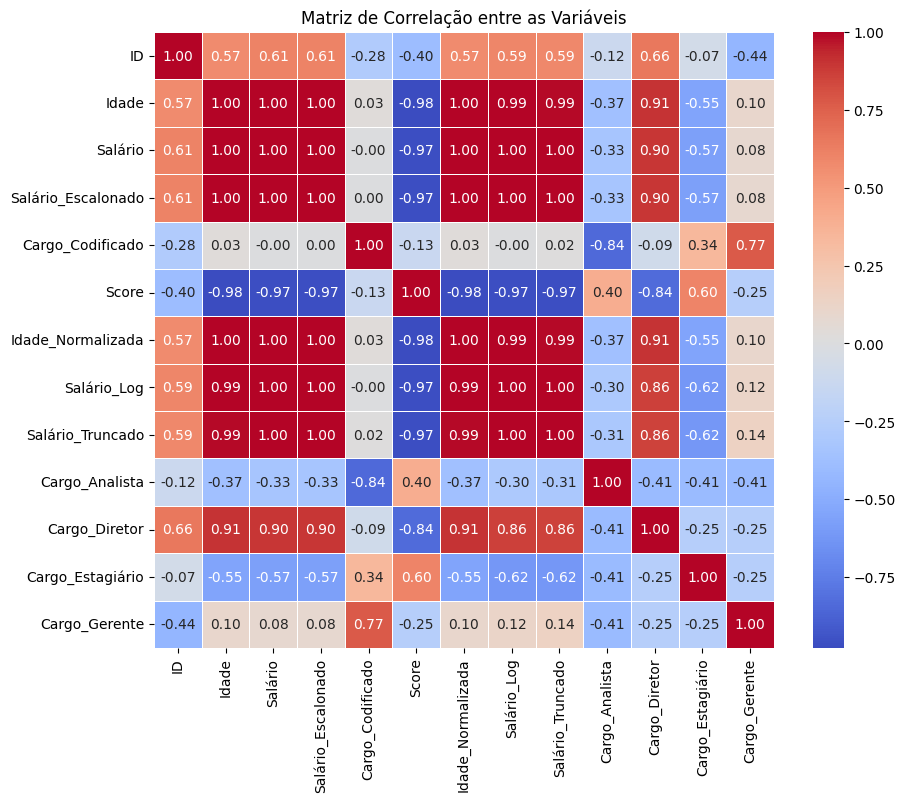

In [16]:
# Verificando a Correlação entre as Variáveis
correlacao = df_onehot.corr()

# Criando o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação entre as Variáveis')
plt.show()


In [32]:
# Salvando o DataFrame Limpo em um arquivo CSV
df_onehot.to_csv('dados_limpos.csv', index=False)

# Integração dos dados
A integração de dados é um processo fundamental na preparação dos dados para análise, que consiste em combinar informações provenientes de várias fontes em um único conjunto de dados coeso. Nesta seção, exploraremos os cinco melhores e mais utilizados processos de integração de dados, utilizando o ambiente Python no Google Colab e o DataFrame exemplo obtido após a limpeza de dados anterior.



##Concatenação de DataFrames:
A concatenação é uma das formas mais simples de integração de dados, onde combinamos DataFrames que possuem a mesma estrutura em relação às colunas. Utilizaremos a função pd.concat para unir os dados de dois DataFrames, adicionando novas linhas.



In [19]:
import pandas as pd

# DataFrame de exemplo após a limpeza de dados
df_limpo = pd.DataFrame({
    'ID': [1, 2, 3],
    'Nome': ['Ana', 'João', 'Maria'],
    'Cargo': ['Analista', 'Gerente', 'Coordenador'],
    'Salário': [3500, 5000, 4200]
})

# DataFrame com novos dados a serem integrados
novos_dados = pd.DataFrame({
    'ID': [4, 5],
    'Nome': ['Pedro', 'Laura'],
    'Cargo': ['Engenheiro', 'Assistente'],
    'Salário': [3800, 2800]
})

# Concatenando os DataFrames
df_integrado = pd.concat([df_limpo, novos_dados], ignore_index=True)

print("\nDataFrame integrado:")
print(df_integrado)



DataFrame integrado:
   ID   Nome        Cargo  Salário
0   1    Ana     Analista     3500
1   2   João      Gerente     5000
2   3  Maria  Coordenador     4200
3   4  Pedro   Engenheiro     3800
4   5  Laura   Assistente     2800


# Merge (Junção) de DataFrames:
O merge é usado quando queremos combinar DataFrames com base em colunas comuns (chaves). É semelhante a uma operação de junção de tabelas em SQL. Utilizaremos a função pd.merge para realizar a junção.



In [20]:
# DataFrame com informações adicionais para junção
dados_adicionais = pd.DataFrame({
    'ID': [2, 3, 6],
    'Departamento': ['RH', 'Finanças', 'TI']
})

# Merge dos DataFrames com base na coluna 'ID'
df_integrado = pd.merge(df_limpo, dados_adicionais, on='ID', how='left')

print("\nDataFrame integrado com informações adicionais:")
print(df_integrado)



DataFrame integrado com informações adicionais:
   ID   Nome        Cargo  Salário Departamento
0   1    Ana     Analista     3500          NaN
1   2   João      Gerente     5000           RH
2   3  Maria  Coordenador     4200     Finanças


# Append de Linhas:
O append é semelhante à concatenação, mas é usado para adicionar linhas de um DataFrame a outro. Ele é útil quando temos um pequeno conjunto de dados que queremos adicionar ao DataFrame principal.



In [21]:
# DataFrame com linhas a serem adicionadas
novas_linhas = pd.DataFrame({
    'ID': [6, 7],
    'Nome': ['Carlos', 'Sofia'],
    'Cargo': ['Estagiário', 'Analista Jr.'],
    'Salário': [1800, 3200]
})

# Adicionando as novas linhas ao DataFrame principal
df_integrado = df_limpo.append(novas_linhas, ignore_index=True)

print("\nDataFrame com linhas adicionadas:")
print(df_integrado)



DataFrame com linhas adicionadas:
   ID    Nome         Cargo  Salário
0   1     Ana      Analista     3500
1   2    João       Gerente     5000
2   3   Maria   Coordenador     4200
3   6  Carlos    Estagiário     1800
4   7   Sofia  Analista Jr.     3200


<ipython-input-21-cb10e54ad4c6>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_integrado = df_limpo.append(novas_linhas, ignore_index=True)


# Join de DataFrames:
O join é uma forma de combinar DataFrames com base em seus índices. Utilizaremos a função df.join para realizar o join.



In [22]:
# DataFrame com informações adicionais para join
dados_adicionais = pd.DataFrame({
    'Setor': ['Vendas', 'Produção', 'Marketing'],
}, index=[1, 2, 3])

# Join dos DataFrames com base no índice
df_integrado = df_limpo.join(dados_adicionais, on='ID')

print("\nDataFrame com informações adicionais após o join:")
print(df_integrado)



DataFrame com informações adicionais após o join:
   ID   Nome        Cargo  Salário      Setor
0   1    Ana     Analista     3500     Vendas
1   2   João      Gerente     5000   Produção
2   3  Maria  Coordenador     4200  Marketing


# Pivot e Unpivot de Dados:
Pivot e Unpivot são técnicas para transformar a estrutura dos dados, tornando-os mais adequados para análises específicas. Pivot transforma linhas em colunas, enquanto Unpivot faz o inverso.



In [24]:
import pandas as pd

# DataFrame de exemplo após a limpeza de dados
df_limpo = pd.DataFrame({
    'ID': [1, 2, 3],
    'Nome': ['Ana', 'João', 'Maria'],
    'Cargo': ['Analista', 'Gerente', 'Coordenador'],
    'Salário': [3500, 5000, 4200]
})

# Exemplo de Pivot (Transformação de linhas em colunas)
df_pivot = df_limpo.pivot(index='ID', columns='Cargo', values='Salário')

print("\nDataFrame após a transformação Pivot:")
print(df_pivot)



DataFrame após a transformação Pivot:
Cargo  Analista  Coordenador  Gerente
ID                                   
1        3500.0          NaN      NaN
2           NaN          NaN   5000.0
3           NaN       4200.0      NaN


# Formatação dos dados

# Padronização de Formatos de Data
A padronização dos formatos de data é importante quando os dados possuem informações temporais. Vamos supor que o DataFrame de exemplo contenha uma coluna 'Data de Admissão' que precisa ser padronizada para o formato "dd/mm/aaaa". Para isso, utilizamos o método pd.to_datetime do Pandas para converter a coluna para o tipo 'datetime' e, em seguida, o método dt.strftime para formatá-la adequadamente.




In [28]:
import pandas as pd

# DataFrame de exemplo após a limpeza de dados
df_limpo = pd.DataFrame({
    'ID': [1, 2, 3],
    'Nome': ['Ana', 'João', 'Maria'],
    'Cargo': ['Analista', 'Gerente', 'Coordenador'],
    'Data de Admissão': ['2022-01-15', '2023-03-10', '2021-12-05'],
    'Salário': [3500, 5000, 4200]
})

# Convertendo a coluna 'Data de Admissão' para o formato "dd/mm/aaaa"
df_limpo['Data de Admissão'] = pd.to_datetime(df_limpo['Data de Admissão'])
df_limpo['Data de Admissão'] = df_limpo['Data de Admissão'].dt.strftime('%d/%m/%Y')

# Exibindo o DataFrame após a padronização de formatos de data
print("DataFrame após a padronização de formatos de data:")
print(df_limpo)


DataFrame após a padronização de formatos de data:
   ID   Nome        Cargo Data de Admissão  Salário
0   1    Ana     Analista       15/01/2022     3500
1   2   João      Gerente       10/03/2023     5000
2   3  Maria  Coordenador       05/12/2021     4200


# Conversão de Unidades de Medida
Outra tarefa comum na formatação de dados é a conversão de unidades de medida. Suponha que o DataFrame contenha uma coluna 'Peso' com os valores em quilogramas, e desejamos convertê-la para libras. Para isso, podemos criar uma função que faça a conversão e aplicá-la à coluna.



In [30]:
def kg_to_lbs(peso_kg):
    return peso_kg * 2.20462

# DataFrame de exemplo após a limpeza de dados
df_limpo['Peso (kg)'] = [65, 75, 60]

# Convertendo a coluna 'Peso (kg)' para libras
df_limpo['Peso (lbs)'] = df_limpo['Peso (kg)'].apply(kg_to_lbs)

# Exibindo o DataFrame após a conversão de unidades de medida
print("\nDataFrame após a conversão de unidades de medida:")
print(df_limpo)


DataFrame após a conversão de unidades de medida:
   ID   Nome        Cargo Data de Admissão  Salário  Peso (kg)  Peso (lbs)
0   1    Ana     Analista       15/01/2022     3500         65    143.3003
1   2   João      Gerente       10/03/2023     5000         75    165.3465
2   3  Maria  Coordenador       05/12/2021     4200         60    132.2772


# Garantindo Convenções de Nomenclatura

A consistência nas convenções de nomenclatura facilita a compreensão dos dados. Vamos considerar que o DataFrame contenha uma coluna 'Departamento' com nomes em caixa alta e outra coluna 'Cidade' com nomes em caixa baixa. Para padronizar ambos os campos em letras iniciais maiúsculas, podemos utilizar o método str.title.

In [31]:
# DataFrame de exemplo após a limpeza de dados
df_limpo['Departamento'] = ['RH', 'FINANÇAS', 'vendas']
df_limpo['Cidade'] = ['são paulo', 'RIO DE JANEIRO', 'BELO HORIZONTE']

# Padronizando as colunas 'Departamento' e 'Cidade' em letras iniciais maiúsculas
df_limpo['Departamento'] = df_limpo['Departamento'].str.title()
df_limpo['Cidade'] = df_limpo['Cidade'].str.title()

# Exibindo o DataFrame após garantir as convenções de nomenclatura
print("\nDataFrame após garantir as convenções de nomenclatura:")
print(df_limpo)


DataFrame após garantir as convenções de nomenclatura:
   ID   Nome        Cargo Data de Admissão  Salário  Peso (kg)  Peso (lbs)  \
0   1    Ana     Analista       15/01/2022     3500         65    143.3003   
1   2   João      Gerente       10/03/2023     5000         75    165.3465   
2   3  Maria  Coordenador       05/12/2021     4200         60    132.2772   

  Departamento          Cidade  
0           Rh       São Paulo  
1     Finanças  Rio De Janeiro  
2       Vendas  Belo Horizonte  


In [33]:
# Salvando o DataFrame Limpo em um arquivo CSV
df_limpo.to_csv('dados_limpos.csv', index=False)

# SCRIPT COMPLETO

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

# Criando um DataFrame de exemplo
dados = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8],
    'Nome': ['João', 'Maria', 'José', 'Ana', 'Pedro', 'Eva', 'Fernanda', 'Carlos'],
    'Idade': [25, 30, None, 22, 28, 35, 27, 40],
    'Salário': [3500, 4000, 2800, 3200, None, 4200, 3800, 5000],
    'Cargo': ['Analista', 'Gerente', 'Analista', 'Estagiário', 'Gerente', None, 'Analista', 'Diretor']
}

df = pd.DataFrame(dados)
print(df)

# Lidando com valores ausentes
df_limpo = df.dropna().reset_index(drop=True)  # Removendo as linhas com valores ausentes
print("\nDataFrame após remoção de linhas com valores ausentes:")
print(df_limpo)

# Corrigindo erros ou imputando valores
valor_medio_salario = df['Salário'].mean()
df['Salário'].fillna(valor_medio_salario, inplace=True)  # Preenchendo valores ausentes com a média dos salários
print("\nDataFrame após imputação de valores ausentes no salário:")
print(df)

# Removendo duplicatas
df_sem_duplicatas = df.drop_duplicates().reset_index(drop=True)
print("\nDataFrame após remoção de duplicatas:")
print(df_sem_duplicatas)

# Escalonamento de Variáveis Numéricas
scaler = StandardScaler()
df_limpo['Salário_Escalonado'] = scaler.fit_transform(df_limpo[['Salário']])
print("\nDataFrame com a coluna 'Salário' escalonada:")
print(df_limpo[['ID', 'Nome', 'Salário', 'Salário_Escalonado']])

# Codificação de Variáveis Categóricas
le = LabelEncoder()
df_limpo['Cargo_Codificado'] = le.fit_transform(df_limpo['Cargo'])
print("\nDataFrame com a coluna 'Cargo' codificada:")
print(df_limpo[['ID', 'Nome', 'Cargo', 'Cargo_Codificado']])

# Criação de Novas Variáveis
df_limpo['Score'] = df_limpo['Salário'] / df_limpo['Idade']
print("\nDataFrame com a nova coluna 'Score':")
print(df_limpo[['ID', 'Nome', 'Salário', 'Idade', 'Score']])

# Normalização de Variáveis
scaler = MinMaxScaler()
df_limpo['Idade_Normalizada'] = scaler.fit_transform(df_limpo[['Idade']])
print("\nDataFrame com a coluna 'Idade' normalizada:")
print(df_limpo[['ID', 'Nome', 'Idade', 'Idade_Normalizada']])

# Transformação Logarítmica
df_limpo['Salário_Log'] = np.log(df_limpo['Salário'])
print("\nDataFrame com a coluna 'Salário' transformada usando logaritmo:")
print(df_limpo[['ID', 'Nome', 'Salário', 'Salário_Log']])

# Tratando Outliers
limite_superior = df_limpo['Salário'].quantile(0.75) + 1.5 * (df_limpo['Salário'].quantile(0.75) - df_limpo['Salário'].quantile(0.25))
df_limpo['Salário_Truncado'] = np.where(df_limpo['Salário'] > limite_superior, limite_superior, df_limpo['Salário'])
print("\nDataFrame com a coluna 'Salário' tratada para outliers:")
print(df_limpo[['ID', 'Nome', 'Salário', 'Salário_Truncado']])

# Binning - Discretização de Variáveis Contínuas
bins = [0, 2500, 3500, 4500, np.inf]
labels = ['Baixo', 'Médio', 'Alto', 'Muito Alto']
df_limpo['Categoria_Salário'] = pd.cut(df_limpo['Salário'], bins=bins, labels=labels)
print("\nDataFrame com a coluna 'Salário' discretizada em categorias:")
print(df_limpo[['ID', 'Nome', 'Salário', 'Categoria_Salário']])

# One-Hot Encoding para Variáveis Categóricas
df_onehot = pd.get_dummies(df_limpo, columns=['Cargo'])
print("\nDataFrame com as colunas de 'Cargo' codificadas com One-Hot Encoding:")
print(df_onehot)

# Lidando com Valores Nulos novamente
df_onehot['Idade'].fillna(df_onehot['Idade'].mean(), inplace=True)  # Preenchendo valores ausentes com a média das idades
print("\nDataFrame após imputação de valores ausentes na idade:")
print(df_onehot)

# Verificando a Correlação entre as Variáveis
correlacao = df_onehot.corr()
print("\nMatriz de correlação entre as variáveis:")
print(correlacao)


